In [1]:
import pandas as pd
from fastai.vision.all import *
import posixpath

In [2]:
df = pd.read_pickle("steam.pkl")

In [3]:
df = df[["appid", "reviews"]]

In [4]:
df = df.drop_duplicates()

In [5]:
path = Path("./headers/")
files = get_image_files(path)

In [6]:
len(files)

11434

In [7]:
def label_func(f): 
    result = df[df["appid"] == int(posixpath.basename(f).split(".")[0])]["reviews"] > 5000
    return result.bool()

In [8]:
label_func("headers/251650.jpg")

False

In [9]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224, method=ResizeMethod.Squish))


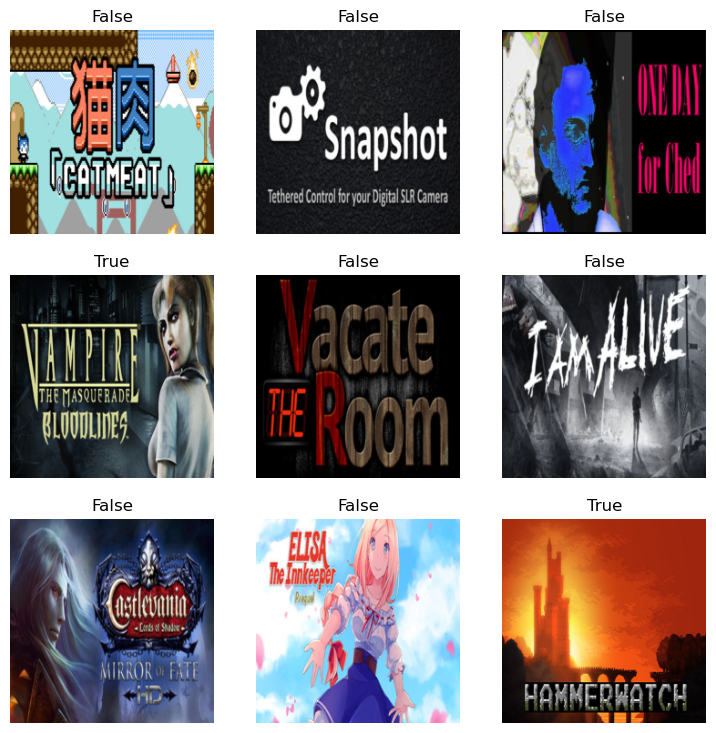

In [10]:
dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/home/franciscotufro/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/franciscotufro/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.281113,0.406478,0.131671,04:57


epoch,train_loss,valid_loss,error_rate,time
0,0.238397,0.368301,0.116360,06:24
1,0.198201,0.455144,0.113736,06:24
2,0.094023,0.543166,0.125984,06:27
3,0.028948,0.592675,0.112423,06:29
4,0.010131,0.597599,0.112423,06:25


In [14]:
learn.save("steam_model.pkl")

Path('headers/models/steam_model.pkl.pth')

In [15]:
learn.export()